# 1. Load correlation with gradient data

In [61]:
#Load correlation with gradient data: corr_rest1, corr_rest3 - lsd, rest 2 -  lsd music, dmt

import pickle
import os 
import numpy as np 


with open ('/Users/mioulin/Desktop/data/dmt/corr_rest1.pkl', 'rb') as handle:
    corr_rest1 = pickle.load(handle)
with open ('/Users/mioulin/Desktop/data/dmt/corr_rest2.pkl', 'rb') as handle:
    corr_rest2 = pickle.load(handle)
with open ('/Users/mioulin/Desktop/data/dmt/corr_rest3.pkl', 'rb') as handle:
    corr_rest3 = pickle.load(handle)
with open ('/Users/mioulin/dmt_corr.pkl', 'rb') as handle:
    corr_dmt = pickle.load(handle)

In [62]:
#Rename dict keys

corr_dmt["drug"] = corr_dmt.pop("dmt")
corr_dmt["pcb"] = corr_dmt.pop("dmt_pcb")
corr_rest1["drug"] = corr_rest1.pop("lsd")
corr_rest1["pcb"] = corr_rest1.pop("pcb")
corr_rest2["drug"] = corr_rest2.pop("lsd")
corr_rest2["pcb"] = corr_rest2.pop("pcb")
corr_rest3["drug"] = corr_rest3.pop("lsd")
corr_rest3["pcb"] = corr_rest3.pop("pcb")


# 2. Calculate Lyapunov exp

In [63]:

import numpy as np


# List of all dictionaries
dicts = [corr_rest1, corr_rest2, corr_rest3, corr_dmt]



# List of all scan names
sessions = ['lsd1', 'lsd2', 'lsd3','dmt']

# Apply the code to each array in each dictionary
for drug in ['drug', 'pcb']:
    for i, d in enumerate(dicts):
        for subject, data in d[drug].items():
            # Calculate derivative
            ddt = np.diff(data, axis=0)

            # Remove first timepoint of data
            data = data[1:]

            # Concatenate data and derivative
            data = np.hstack((data, ddt))

            # Split data
            half = len(data) // 2
            data_1 = data[:half]
            data_2 = data[half:]

            # Calculate Euclidean distances between all points in data_1 and data_2
            euc = np.sqrt(np.sum((data_1[:, np.newaxis] - data_2)**2, axis=2))

            # Find where the minimum distance is
            T1, T2 = np.unravel_index(np.argmin(euc[:-2], axis=None), euc.shape)

            # Number of time points to use for Lyapunov exponent
            tLya = 4

            # Cut the split data to relevant window, starting at min. dist
            data_1 = data_1[T1:T1+tLya].T
            data_2 = data_2[T2:T2+tLya].T

            # Initial distance
            D_init = np.sqrt(np.sum((data_1[:, 0] - data_2[:, 0])**2))
            
        

            # Final distance
            D_final = np.sqrt(np.sum((data_1[:, 1] - data_2[:, 1])**2))

            # Calculate Lyapunov exponent
            Lyapunov = np.log(D_final / D_init) / tLya

            print(f"Lyapunov exponent for {drug}, {sessions[i]}, subject {subject}:", Lyapunov)




Lyapunov exponent for drug, lsd1, subject 001: 0.18569403080653527
Lyapunov exponent for drug, lsd1, subject 004: 0.17193031302650819
Lyapunov exponent for drug, lsd1, subject 002: 0.31062242862529676
Lyapunov exponent for drug, lsd1, subject 006: 0.17852385318421218
Lyapunov exponent for drug, lsd1, subject 009: 0.07643642034296531
Lyapunov exponent for drug, lsd1, subject 010: 0.23846961847685938
Lyapunov exponent for drug, lsd1, subject 011: 0.24922138591040122
Lyapunov exponent for drug, lsd1, subject 013: 0.052910796352978254
Lyapunov exponent for drug, lsd1, subject 017: 0.49395138494320134
Lyapunov exponent for drug, lsd1, subject 018: 0.35104731715532583
Lyapunov exponent for drug, lsd1, subject 019: 0.35562981836206853
Lyapunov exponent for drug, lsd1, subject 020: 0.32759471778766924
Lyapunov exponent for drug, lsd2, subject 001: 0.2878102302616436
Lyapunov exponent for drug, lsd2, subject 004: 0.30141758037842736
Lyapunov exponent for drug, lsd2, subject 002: 0.2219070707159

In [64]:
# Different way of results 

import numpy as np


dicts = [corr_rest1, corr_rest2, corr_rest3, corr_dmt]

# List of all scan names
session = ['lsd1', 'lsd2', 'lsd3','dmt']

# Initialize the result dictionary
results = {'lsd1': {'drug': {}, 'pcb': {}}, 'lsd2': {'drug': {}, 'pcb': {}}, 'lsd3': {'drug': {}, 'pcb': {}},'dmt': {'drug': {}, 'pcb': {}}}

# Apply the code to each array in each dictionary
for drug in ['drug', 'pcb']:
    for i, d in enumerate(dicts):
        for subject, data in d[drug].items():
            # Calculate derivative
            ddt = np.diff(data, axis=0)

            # Remove first timepoint of data
            data = data[1:]

            # Concatenate data and derivative
            data = np.hstack((data, ddt))

            # Split data
            half = len(data) // 2
            data_1 = data[:half]
            data_2 = data[half:]

            # Calculate Euclidean distances between all points in data_1 and data_2
            euc = np.sqrt(np.sum((data_1[:, np.newaxis] - data_2)**2, axis=2))

            # Find where the minimum distance is
            T1, T2 = np.unravel_index(np.argmin(euc[:-2], axis=None), euc.shape)

            # Number of time points to use for Lyapunov exponent
            tLya = 4

            # Cut the split data to relevant window, starting at min. dist
            data_1 = data_1[T1:T1+tLya].T
            data_2 = data_2[T2:T2+tLya].T

            # Initial distance
            D_init = np.sqrt(np.sum((data_1[:, 0] - data_2[:, 0])**2))

            # Final distance
            D_final = np.sqrt(np.sum((data_1[:, 1] - data_2[:, 1])**2))

            # Calculate Lyapunov exponent
            Lyapunov = np.log(D_final / D_init) / tLya

            # Store the result in the dictionary
            results[session[i]][drug][subject] = Lyapunov

print(results)

{'lsd1': {'drug': {'001': 0.18569403080653527, '004': 0.17193031302650819, '002': 0.31062242862529676, '006': 0.17852385318421218, '009': 0.07643642034296531, '010': 0.23846961847685938, '011': 0.24922138591040122, '013': 0.052910796352978254, '017': 0.49395138494320134, '018': 0.35104731715532583, '019': 0.35562981836206853, '020': 0.32759471778766924}, 'pcb': {'001': 0.25878673535318275, '004': 0.21462690020137218, '002': 0.36003370705564647, '006': 0.4094111063268623, '009': 0.16231594992600215, '010': 0.33445650405571603, '011': 0.31816351971471835, '013': 0.08911632769743803, '017': 0.33148770913874964, '018': 0.33246417489970054, '019': 0.36220630215546795, '020': 0.004172563353972315}}, 'lsd2': {'drug': {'001': 0.2878102302616436, '004': 0.30141758037842736, '002': 0.22190707071591337, '006': 0.5734063091658385, '009': 0.2971042258011276, '010': 0.15313002652532037, '011': 0.045894664782329994, '013': 0.24146841206526606, '017': 0.02612153248379868, '018': 0.20621864563232145, '

# 3. Shapiro Test 

To perform a statistical test to compare the Lyapunov exponents between the 'drug' and 'pcb' conditions, a paired t-test will be used if the data are normally distributed, or a Wilcoxon signed-rank test if they are not

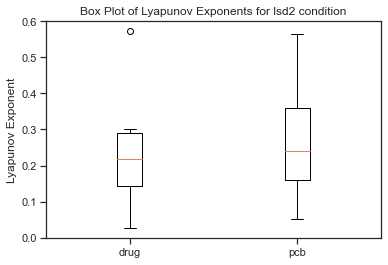

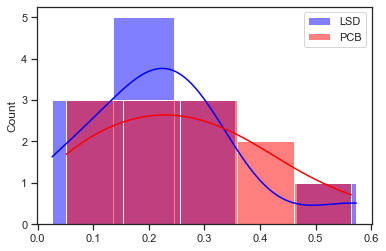

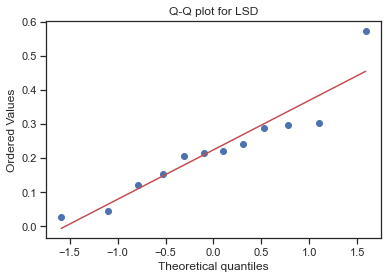

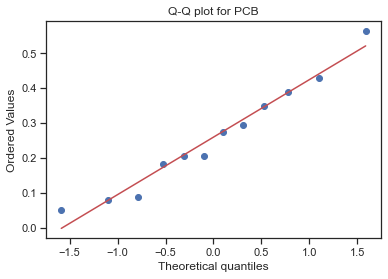

LSD data is normally distributed.
PCB data is normally distributed.
Paired t-test:
t-statistic: -0.6597371054861831
p-value: 0.5229956324195899

Wilcoxon signed-rank test:
w-statistic: 35.0
p-value: 0.791015625


In [79]:
# LSD Music 

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

subjects = results['lsd2']['drug'].keys()
lyapunov_exponents_lsd = [results['lsd2']['drug'][subject] for subject in subjects]
lyapunov_exponents_pcb = [results['lsd2']['pcb'][subject] for subject in subjects]

data = [lyapunov_exponents_lsd, lyapunov_exponents_pcb]

fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(data)

ax.set_xticklabels(['drug', 'pcb'])
ax.set_ylabel('Lyapunov Exponent')
ax.set_title('Box Plot of Lyapunov Exponents for lsd2 condition')

plt.show()

# Histogram
sns.histplot(data=lyapunov_exponents_lsd, kde=True, color='blue', label='LSD')
sns.histplot(data=lyapunov_exponents_pcb, kde=True, color='red', label='PCB')
plt.legend()
plt.show()

# Q-Q plot
stats.probplot(lyapunov_exponents_lsd, dist="norm", plot=plt)
plt.title("Q-Q plot for LSD")
plt.show()

stats.probplot(lyapunov_exponents_pcb, dist="norm", plot=plt)
plt.title("Q-Q plot for PCB")
plt.show()

# Shapiro-Wilk test
shapiro_test_lsd = stats.shapiro(lyapunov_exponents_lsd)
shapiro_test_pcb = stats.shapiro(lyapunov_exponents_pcb)

# Check if the data is normally distributed based on the Shapiro-Wilk test results
alpha = 0.05  # significance level
if shapiro_test_lsd.pvalue > alpha:
    print("LSD data is normally distributed.")
else:
    print("LSD data is not normally distributed.")

if shapiro_test_pcb.pvalue > alpha:
    print("PCB data is normally distributed.")
else:
    print("PCB data is not normally distributed.")
# Perform a paired t-test
t_stat, p_val = stats.ttest_rel(lyapunov_exponents_lsd, lyapunov_exponents_pcb)
print(f"Paired t-test:\nt-statistic: {t_stat}\np-value: {p_val}")

# Perform a Wilcoxon signed-rank test
w_stat, p_val = stats.wilcoxon(lyapunov_exponents_lsd, lyapunov_exponents_pcb)
print(f"\nWilcoxon signed-rank test:\nw-statistic: {w_stat}\np-value: {p_val}")

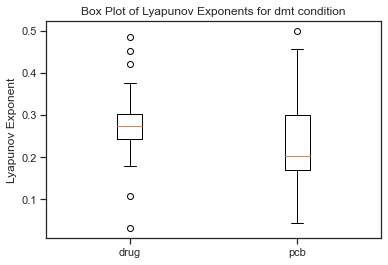

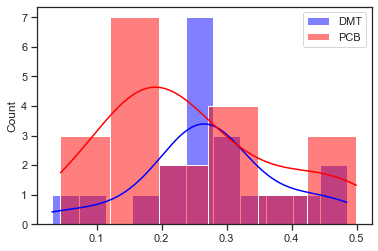

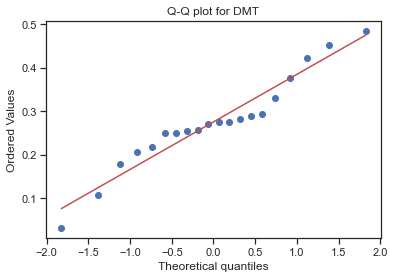

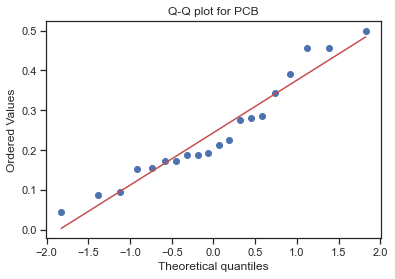

DMT data is normally distributed.
PCB data is normally distributed.
Paired t-test:
t-statistic: 0.7587408272531732
p-value: 0.4573174713681366

Wilcoxon signed-rank test:
w-statistic: 81.0
p-value: 0.38837623596191406


In [80]:
# Lyapunov for dmt only 
import matplotlib.pyplot as plt


subjects = results['dmt']['drug'].keys()
lyapunov_exponents_dmt = [results['dmt']['drug'][subject] for subject in subjects]
lyapunov_exponents_pcb = [results['dmt']['pcb'][subject] for subject in subjects]


data = [lyapunov_exponents_dmt, lyapunov_exponents_pcb]

fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(data)

ax.set_xticklabels(['drug', 'pcb'])
ax.set_ylabel('Lyapunov Exponent')
ax.set_title('Box Plot of Lyapunov Exponents for dmt condition')

plt.show()

# Histogram
sns.histplot(data=lyapunov_exponents_dmt, kde=True, color='blue', label='DMT')
sns.histplot(data=lyapunov_exponents_pcb, kde=True, color='red', label='PCB')
plt.legend()
plt.show()

# Q-Q plot
stats.probplot(lyapunov_exponents_dmt, dist="norm", plot=plt)
plt.title("Q-Q plot for DMT")
plt.show()

stats.probplot(lyapunov_exponents_pcb, dist="norm", plot=plt)
plt.title("Q-Q plot for PCB")
plt.show()

# Shapiro-Wilk test
shapiro_test_dmt = stats.shapiro(lyapunov_exponents_dmt)
shapiro_test_pcb = stats.shapiro(lyapunov_exponents_pcb)

# Check if the data is normally distributed based on the Shapiro-Wilk test results
alpha = 0.05  # significance level
if shapiro_test_dmt.pvalue > alpha:
    print("DMT data is normally distributed.")
else:
    print("DMT data is not normally distributed.")

if shapiro_test_pcb.pvalue > alpha:
    print("PCB data is normally distributed.")
else:
    print("PCB data is not normally distributed.")
# Perform a paired t-test
t_stat, p_val = stats.ttest_rel(lyapunov_exponents_dmt, lyapunov_exponents_pcb)
print(f"Paired t-test:\nt-statistic: {t_stat}\np-value: {p_val}")

# Perform a Wilcoxon signed-rank test
w_stat, p_val = stats.wilcoxon(lyapunov_exponents_dmt, lyapunov_exponents_pcb)
print(f"\nWilcoxon signed-rank test:\nw-statistic: {w_stat}\np-value: {p_val}")

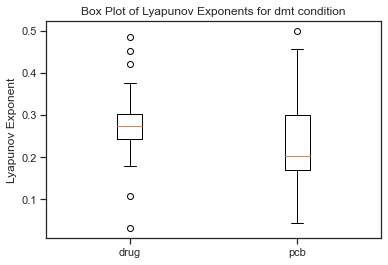

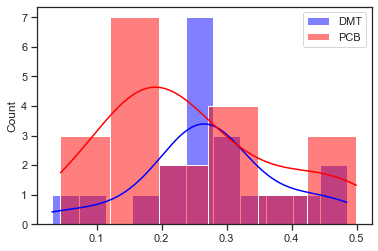

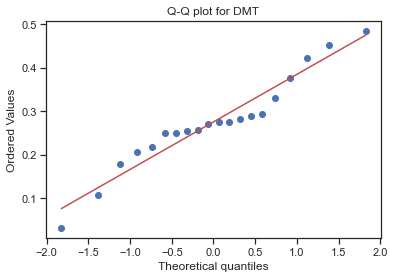

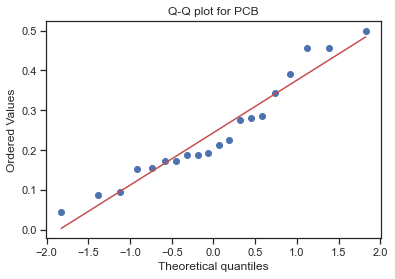

DMT data is normally distributed.
PCB data is normally distributed.


In [71]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

subjects = results['dmt']['drug'].keys()
lyapunov_exponents_lsd = [results['dmt']['drug'][subject] for subject in subjects]
lyapunov_exponents_pcb = [results['dmt']['pcb'][subject] for subject in subjects]

data = [lyapunov_exponents_dmt, lyapunov_exponents_pcb]

fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(data)

ax.set_xticklabels(['drug', 'pcb'])
ax.set_ylabel('Lyapunov Exponent')
ax.set_title('Box Plot of Lyapunov Exponents for dmt condition')

plt.show()

# Histogram
sns.histplot(data=lyapunov_exponents_dmt, kde=True, color='blue', label='DMT')
sns.histplot(data=lyapunov_exponents_pcb, kde=True, color='red', label='PCB')
plt.legend()
plt.show()

# Q-Q plot
stats.probplot(lyapunov_exponents_dmt, dist="norm", plot=plt)
plt.title("Q-Q plot for DMT")
plt.show()

stats.probplot(lyapunov_exponents_pcb, dist="norm", plot=plt)
plt.title("Q-Q plot for PCB")
plt.show()

# Shapiro-Wilk test
shapiro_test_dmt = stats.shapiro(lyapunov_exponents_dmt)
shapiro_test_pcb = stats.shapiro(lyapunov_exponents_pcb)

# Check if the data is normally distributed based on the Shapiro-Wilk test results
alpha = 0.05  # significance level
if shapiro_test_lsd.pvalue > alpha:
    print("DMT data is normally distributed.")
else:
    print("DMT data is not normally distributed.")

if shapiro_test_pcb.pvalue > alpha:
    print("PCB data is normally distributed.")
else:
    print("PCB data is not normally distributed.")


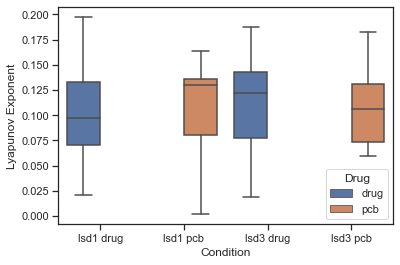

In [52]:
# Lyapunov for rest lsd 1 and 3 only 
import seaborn as sns
import pandas as pd


sessions = ['lsd1', 'lsd3']
drugs = ['drug', 'pcb']

# Initialize a list to store the Lyapunov exponents, subjects, conditions, and drugs
data = []

# Get the Lyapunov exponents, subjects, conditions, and drugs
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data.append([lyapunov_exponent, subject, f'{session} {drug}', drug])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Lyapunov Exponent', 'Subject', 'Condition', 'Drug'])

# Create a box plot
sns.boxplot(x='Condition', y='Lyapunov Exponent', hue='Drug', data=df)

# Display the plot
plt.show()



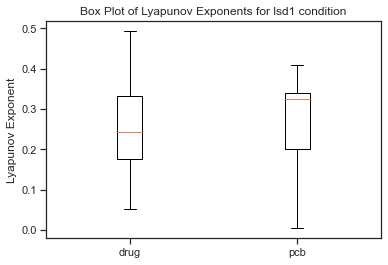

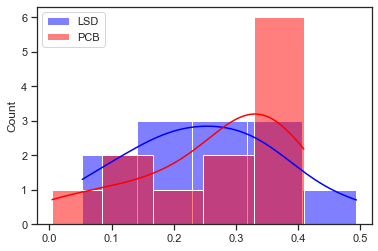

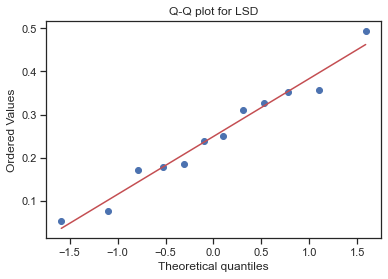

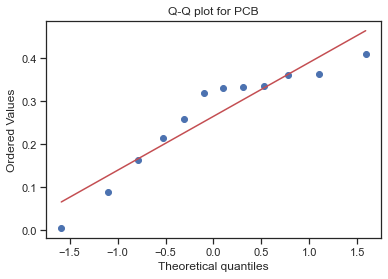

LSD data is normally distributed.
PCB data is normally distributed.


In [74]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

subjects = results['lsd1']['drug'].keys()
lyapunov_exponents_lsd = [results['lsd1']['drug'][subject] for subject in subjects]
lyapunov_exponents_pcb = [results['lsd1']['pcb'][subject] for subject in subjects]

data = [lyapunov_exponents_lsd, lyapunov_exponents_pcb]

fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(data)

ax.set_xticklabels(['drug', 'pcb'])
ax.set_ylabel('Lyapunov Exponent')
ax.set_title('Box Plot of Lyapunov Exponents for lsd1 condition')

plt.show()

# Histogram
sns.histplot(data=lyapunov_exponents_lsd, kde=True, color='blue', label='LSD')
sns.histplot(data=lyapunov_exponents_pcb, kde=True, color='red', label='PCB')
plt.legend()
plt.show()

# Q-Q plot
stats.probplot(lyapunov_exponents_lsd, dist="norm", plot=plt)
plt.title("Q-Q plot for LSD")
plt.show()

stats.probplot(lyapunov_exponents_pcb, dist="norm", plot=plt)
plt.title("Q-Q plot for PCB")
plt.show()

# Shapiro-Wilk test
shapiro_test_lsd = stats.shapiro(lyapunov_exponents_lsd)
shapiro_test_pcb = stats.shapiro(lyapunov_exponents_pcb)

# Check if the data is normally distributed based on the Shapiro-Wilk test results
alpha = 0.05  # significance level
if shapiro_test_lsd.pvalue > alpha:
    print("LSD data is normally distributed.")
else:
    print("LSD data is not normally distributed.")

if shapiro_test_pcb.pvalue > alpha:
    print("PCB data is normally distributed.")
else:
    print("PCB data is not normally distributed.")


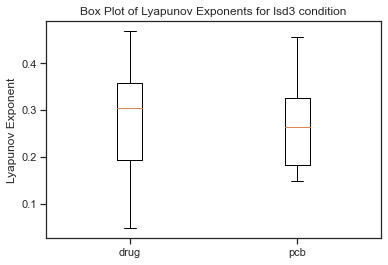

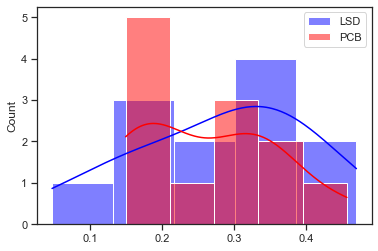

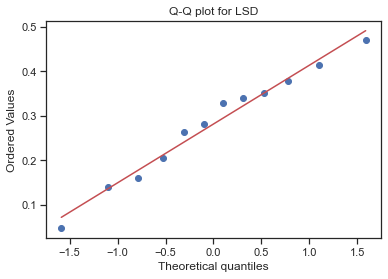

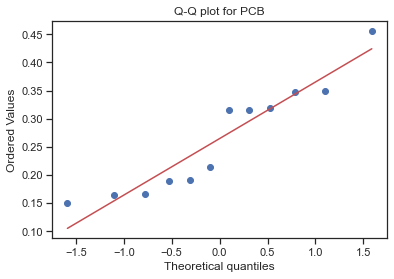

LSD data is normally distributed.
PCB data is normally distributed.


In [76]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

subjects = results['lsd3']['drug'].keys()
lyapunov_exponents_lsd = [results['lsd3']['drug'][subject] for subject in subjects]
lyapunov_exponents_pcb = [results['lsd3']['pcb'][subject] for subject in subjects]

data = [lyapunov_exponents_lsd, lyapunov_exponents_pcb]

fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(data)

ax.set_xticklabels(['drug', 'pcb'])
ax.set_ylabel('Lyapunov Exponent')
ax.set_title('Box Plot of Lyapunov Exponents for lsd3 condition')

plt.show()

# Histogram
sns.histplot(data=lyapunov_exponents_lsd, kde=True, color='blue', label='LSD')
sns.histplot(data=lyapunov_exponents_pcb, kde=True, color='red', label='PCB')
plt.legend()
plt.show()

# Q-Q plot
stats.probplot(lyapunov_exponents_lsd, dist="norm", plot=plt)
plt.title("Q-Q plot for LSD")
plt.show()

stats.probplot(lyapunov_exponents_pcb, dist="norm", plot=plt)
plt.title("Q-Q plot for PCB")
plt.show()

# Shapiro-Wilk test
shapiro_test_lsd = stats.shapiro(lyapunov_exponents_lsd)
shapiro_test_pcb = stats.shapiro(lyapunov_exponents_pcb)

# Check if the data is normally distributed based on the Shapiro-Wilk test results
alpha = 0.05  # significance level
if shapiro_test_lsd.pvalue > alpha:
    print("LSD data is normally distributed.")
else:
    print("LSD data is not normally distributed.")

if shapiro_test_pcb.pvalue > alpha:
    print("PCB data is normally distributed.")
else:
    print("PCB data is not normally distributed.")


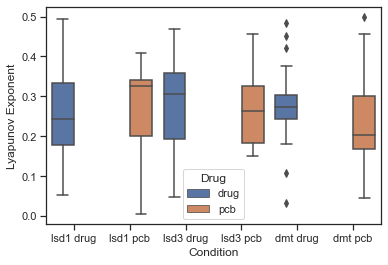

In [77]:
# Lyapunov for rest lsd and dmt  - no music 
import seaborn as sns
import pandas as pd


sessions = ['lsd1', 'lsd3', 'dmt']
drugs = ['drug', 'pcb']

# Initialize a list to store the Lyapunov exponents, subjects, conditions, and drugs
data = []

# Get the Lyapunov exponents, subjects, conditions, and drugs
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data.append([lyapunov_exponent, subject, f'{session} {drug}', drug])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Lyapunov Exponent', 'Subject', 'Condition', 'Drug'])

# Create a box plot
sns.boxplot(x='Condition', y='Lyapunov Exponent', hue='Drug', data=df)

# Display the plot
plt.show()

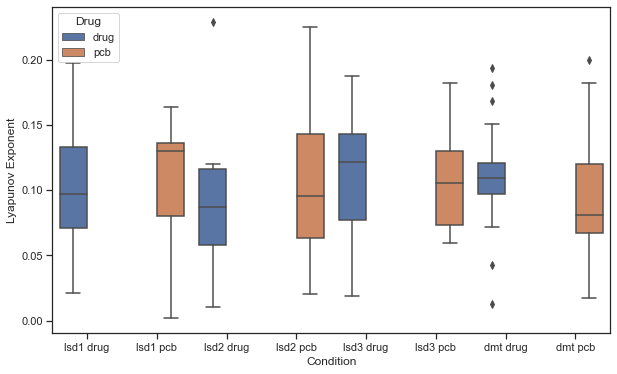

In [54]:
# Lyapunov for rest lsd and dmt  - no music 
import seaborn as sns
import pandas as pd


sessions = ['lsd1', 'lsd2', 'lsd3', 'dmt']
drugs = ['drug', 'pcb']

# Initialize a list to store the Lyapunov exponents, subjects, conditions, and drugs
data = []

# Get the Lyapunov exponents, subjects, conditions, and drugs
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data.append([lyapunov_exponent, subject, f'{session} {drug}', drug])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Lyapunov Exponent', 'Subject', 'Condition', 'Drug'])

# Create a box plot
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.boxplot(x='Condition', y='Lyapunov Exponent', hue='Drug', data=df)

# Display the plot
plt.show()



# 4. Mixed Effect Model 

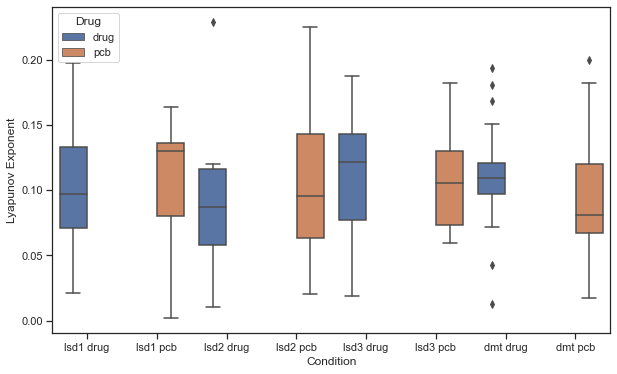

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q('Lyapunov Exponent')
No. Observations: 112     Method:             REML                  
No. Groups:       32      Scale:              0.0024                
Min. group size:  2       Log-Likelihood:     170.9884              
Max. group size:  6       Converged:          Yes                   
Mean group size:  3.5                                               
----------------------------------------------------------------------
                  Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
----------------------------------------------------------------------
Intercept          0.104      0.007   15.802   0.000    0.091    0.117
Drug[T.pcb]       -0.002      0.009   -0.178   0.858   -0.020    0.017
Group Var          0.000      0.003                                   



/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [56]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

sessions = ['lsd1', 'lsd2', 'lsd3', 'dmt']
drugs = ['drug', 'pcb']

# Initialize a list to store the Lyapunov exponents, subjects, conditions, and drugs
data = []

# Get the Lyapunov exponents, subjects, conditions, and drugs
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data.append([lyapunov_exponent, subject, f'{session} {drug}', drug])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Lyapunov Exponent', 'Subject', 'Condition', 'Drug'])

# Create a box plot
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.boxplot(x='Condition', y='Lyapunov Exponent', hue='Drug', data=df)

# Display the plot
plt.show()

# Mixed effect model
md = smf.mixedlm("Q('Lyapunov Exponent') ~ Drug", df, groups=df["Subject"])
mdf = md.fit()
print(mdf.summary())



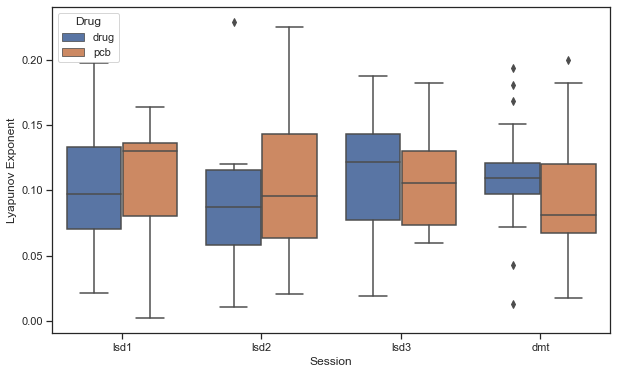

/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to con

                      Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     Q('Lyapunov Exponent')
No. Observations:       112         Method:                 REML                  
No. Groups:             32          Scale:                  0.0018                
Min. group size:        2           Log-Likelihood:         171.4040              
Max. group size:        6           Converged:              No                    
Mean group size:        3.5                                                       
----------------------------------------------------------------------------------
                                      Coef.   Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------
Intercept                              0.105      0.008 12.972 0.000  0.089  0.120
Drug[T.pcb]                           -0.002      0.008 -0.209 0.835 -0.017  0.014
Group Var                  

In [57]:
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf

sessions = ['lsd1', 'lsd2', 'lsd3', 'dmt']
drugs = ['drug', 'pcb']

# Initialize a list to store the Lyapunov exponents, subjects, conditions, and drugs
data = []

# Get the Lyapunov exponents, subjects, conditions, and drugs
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data.append([lyapunov_exponent, subject, session, drug])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Lyapunov Exponent', 'Subject', 'Session', 'Drug'])

# Create a box plot
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.boxplot(x='Session', y='Lyapunov Exponent', hue='Drug', data=df)

# Display the plot
plt.show()

# Mixed effect model
md = smf.mixedlm("Q('Lyapunov Exponent') ~ Drug", df, groups=df["Subject"], re_formula="~Session")
mdf = md.fit()
print(mdf.summary())




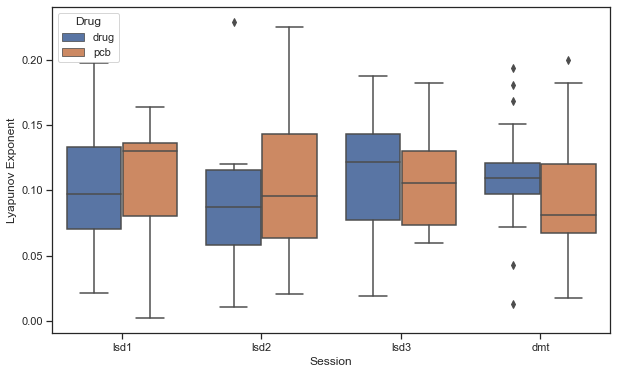

/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to con

                      Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     Q('Lyapunov Exponent')
No. Observations:       112         Method:                 REML                  
No. Groups:             32          Scale:                  0.0018                
Min. group size:        2           Log-Likelihood:         171.4040              
Max. group size:        6           Converged:              No                    
Mean group size:        3.5                                                       
----------------------------------------------------------------------------------
                                      Coef.   Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------
Intercept                              0.105      0.008 12.972 0.000  0.089  0.120
Drug[T.pcb]                           -0.002      0.008 -0.209 0.835 -0.017  0.014
Group Var                  

In [58]:
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf

sessions = ['lsd1', 'lsd2', 'lsd3', 'dmt']
drugs = ['drug', 'pcb']

# Initialize a list to store the Lyapunov exponents, subjects, conditions, and drugs
data = []

# Get the Lyapunov exponents, subjects, conditions, and drugs
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data.append([lyapunov_exponent, subject, session, drug])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Lyapunov Exponent', 'Subject', 'Session', 'Drug'])

# Create a box plot
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.boxplot(x='Session', y='Lyapunov Exponent', hue='Drug', data=df)

# Display the plot
plt.show()

# Mixed effect model
md = smf.mixedlm("Q('Lyapunov Exponent') ~ Drug", df, groups=df["Subject"], re_formula="~Session")
mdf = md.fit()
print(mdf.summary())


# The results of a mixed linear model regression



- The Intercept (0.348) is the estimated average Lyapunov Exponent for the 'drug' group (since 'drug' is the reference category for the 'Drug' variable). This is statistically significant (p < 0.001), indicating that the average Lyapunov Exponent for the 'drug' group is significantly different from zero.

- The coefficient for drug (-0.006) represents the estimated difference in the average Lyapunov Exponent between the 'pcb' group and the 'drug' group. However, this is not statistically significant (p = 0.835), indicating that the model did not find a significant difference in the average Lyapunov Exponent between these two groups.

- The 'Group Var' (0.001) represents the estimated variance of the random intercepts for 'Subject'. This suggests that there is some variability in the average Lyapunov Exponent between different subjects.

- The 'Session Var' represents the estimated variance of the random intercepts for 'Session'. This suggests that there is some variability in the average Lyapunov Exponent between different sessions.

- The 'Group x Session Cov' represents the estimated covariance between the random intercepts for 'Subject' and 'Session'. This suggests that there is some correlation between the subject-specific and session-specific random effects.

- The model did not converge, which suggests that the estimation algorithm did not successfully find the maximum likelihood estimates of the model parameters. This could be due to a number of issues, such as a poorly specified model, multicollinearity in the predictors, or numerical instability in the estimation algorithm. It would be advisable to check the model specification and the data, and to try different starting values or optimization methods if possible.



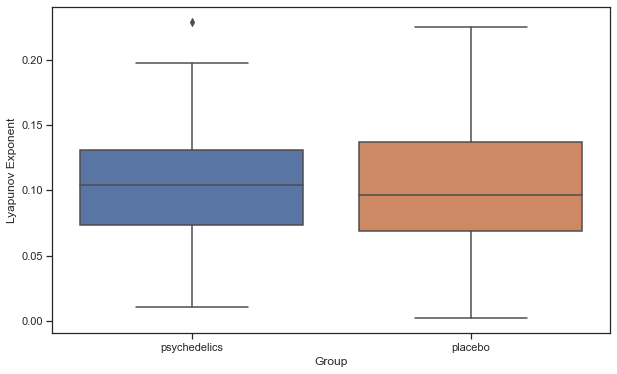

/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to con

                       Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      Q('Lyapunov Exponent')
No. Observations:      112          Method:                  REML                  
No. Groups:            32           Scale:                   0.0018                
Min. group size:       2            Log-Likelihood:          171.4040              
Max. group size:       6            Converged:               No                    
Mean group size:       3.5                                                         
-----------------------------------------------------------------------------------
                                      Coef.    Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------
Intercept                              0.103       0.008 12.766 0.000  0.087  0.119
Group[T.psychedelics]                  0.002       0.008  0.209 0.835 -0.014  0.017
Group Var      

In [59]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

sessions = ['lsd1', 'lsd2', 'lsd3', 'dmt']
drugs = ['drug', 'pcb']

# Initialize a list to store the Lyapunov exponents, subjects, conditions, and drugs
data = []

# Get the Lyapunov exponents, subjects, conditions, and drugs
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data.append([lyapunov_exponent, subject, session, drug])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Lyapunov Exponent', 'Subject', 'Session', 'Drug'])

# Create a new column 'Group' that categorizes 'Drug' into 'psychedelics' and 'placebo'
df['Group'] = df['Drug'].map({'drug': 'psychedelics', 'pcb': 'placebo'})

# Create a box plot
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.boxplot(x='Group', y='Lyapunov Exponent', data=df)

# Display the plot
plt.show()

# Mixed effect model
md = smf.mixedlm("Q('Lyapunov Exponent') ~ Group", df, groups=df["Subject"], re_formula="~Session")
mdf = md.fit()
print(mdf.summary())


# Results of a mixed linear model regression



- The Intercept (0.343) is the estimated average Lyapunov Exponent for the 'placebo' group (since 'placebo' is the reference category for the 'Group' variable). This is statistically significant (p < 0.001), indicating that the average Lyapunov Exponent for the 'placebo' group is significantly different from zero.

- The coefficient for 'Group Psychedelics' (0.006) represents the estimated difference in the average Lyapunov Exponent between the 'psychedelics' group and the 'placebo' group. However, this is not statistically significant (p = 0.835), indicating that the model did not find a significant difference in the average Lyapunov Exponent between these two groups.

- The 'Group Var' (0.001) represents the estimated variance of the random intercepts for 'Subject'. This suggests that there is some variability in the average Lyapunov Exponent between different subjects.

- The 'Session Var' represents the estimated variance of the random intercepts for 'Session'. This suggests that there is some variability in the average Lyapunov Exponent between different sessions.

- The 'Group x Session Cov' represents the estimated covariance between the random intercepts for 'Subject' and 'Session'. This suggests that there is some correlation between the subject-specific and session-specific random effects.

- The model did not converge, which suggests that the estimation algorithm did not successfully find the maximum likelihood estimates of the model parameters. This could be due to a number of issues, such as a poorly specified model, multicollinearity in the predictors, or numerical instability in the estimation algorithm. It would be advisable to check the model specification and the data, and to try different starting values or optimization methods if possible.


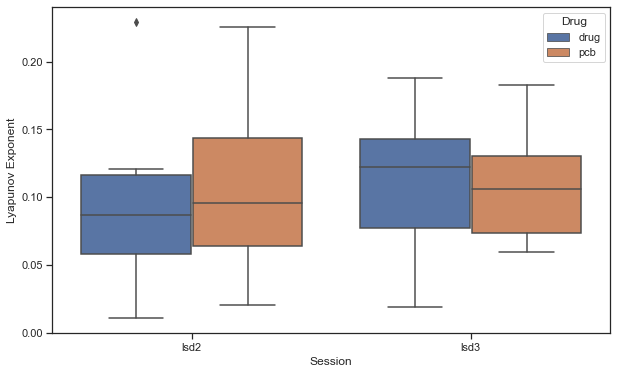

                Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Q('Lyapunov Exponent')
No. Observations:  48      Method:             REML                  
No. Groups:        12      Scale:              0.0021                
Min. group size:   4       Log-Likelihood:     68.7691               
Max. group size:   4       Converged:          Yes                   
Mean group size:   4.0                                               
---------------------------------------------------------------------
                            Coef.  Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                    0.103    0.011 9.120 0.000  0.081  0.126
Drug[T.pcb]                  0.004    0.013 0.275 0.783 -0.022  0.030
Group Var                    0.001    0.024                          
Group x Session[T.lsd3] Cov -0.001    0.023                          
Session[T.lsd3] Var          0.000  

/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/mioulin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [60]:
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf

sessions = ['lsd2', 'lsd3']
drugs = ['drug', 'pcb']

# Initialize a list to store the Lyapunov exponents, subjects, conditions, and drugs
data = []

# Get the Lyapunov exponents, subjects, conditions, and drugs
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data.append([lyapunov_exponent, subject, session, drug])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Lyapunov Exponent', 'Subject', 'Session', 'Drug'])

# Create a box plot
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.boxplot(x='Session', y='Lyapunov Exponent', hue='Drug', data=df)

# Display the plot
plt.show()

# Mixed effect model
md = smf.mixedlm("Q('Lyapunov Exponent') ~ Drug", df, groups=df["Subject"], re_formula="~Session")
mdf = md.fit()
print(mdf.summary())



# 5. Subject Level Differences

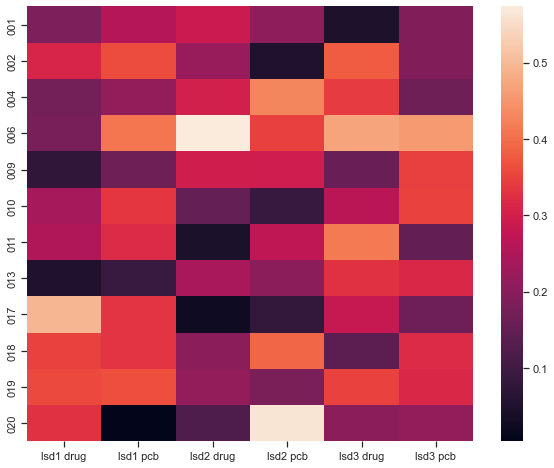

In [83]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'results' is your dictionary containing Lyapunov exponents
sessions = ['lsd1', 'lsd2', 'lsd3']
drugs = ['drug', 'pcb']

# Initialize a dictionary to store the Lyapunov exponents for each subject, condition, and drug
data = {}

# Get the Lyapunov exponents for each subject, condition, and drug
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data[(subject, f'{session} {drug}')] = lyapunov_exponent

# Convert the dictionary to a DataFrame
df = pd.Series(data).unstack()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(df)

# Display the plot
plt.show()


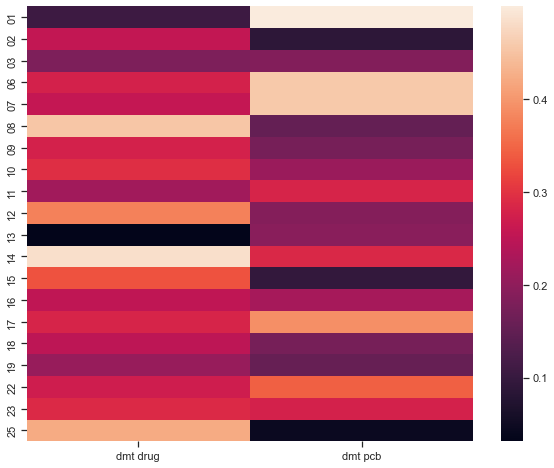

In [84]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'results' is your dictionary containing Lyapunov exponents
sessions = ['dmt']
drugs = ['drug', 'pcb']

# Initialize a dictionary to store the Lyapunov exponents for each subject, condition, and drug
data = {}

# Get the Lyapunov exponents for each subject, condition, and drug
for session in sessions:
    for drug in drugs:
        for subject, lyapunov_exponent in results[session][drug].items():
            data[(subject, f'{session} {drug}')] = lyapunov_exponent

# Convert the dictionary to a DataFrame
df = pd.Series(data).unstack()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(df)

# Display the plot
plt.show()
